In [1]:
import pandas as pd
import numpy as np

Load and show the dataframe shape.

In [2]:
customer_data = pd.read_csv('c:/users/ameli/IRONHACK/WEEK_1/DAY_2/AFTERNOON_SESSION/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
customer_data = customer_data.drop(['Unnamed: 0'], axis=1)
display(customer_data)
print('Df shape:', customer_data.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Df shape: (10910, 25)


Standardize header names.

In [3]:
def standardize_data (df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = list(map(lambda x: x.replace(" ", "_"), df.columns))
    df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']] = df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']].apply(round,1)
    return df

print('Before standardization:\n', customer_data.columns)
customer_data = standardize_data(customer_data)
print('\nAfter standardization:\n', customer_data.columns)




Before standardization:
 Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

After standardization:
 Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_c

Which columns are numerical?

In [4]:
print('Numerical cols are:', list(customer_data._get_numeric_data().columns))

Numerical cols are: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


Which columns are categorical?

In [5]:
print('Categorical cols are:', list(customer_data.select_dtypes(['object']).columns))

Categorical cols are: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


Check and deal with NaN values.

In [6]:
# We can see that there're more than 600 nan values in customer_lifetime_value, response, months_since_last_claim,
# number_of_open_complaints, vehicle_class and vehicle_size columns. The number of nan values on vehicle_type col
# exceeds 5.000. Let's create a df in order to see it more clearly
nan_values = pd.DataFrame(round(customer_data.isna().sum()/len(customer_data),4)*100).reset_index()
nan_values.columns = ['header', 'percent_nulls']
nan_values = nan_values[nan_values['percent_nulls'] > 2]
display(nan_values)

,header,percent_nulls
1,state,5.78
3,response,5.78
13,months_since_last_claim,5.80
15,number_of_open_complaints,5.80
22,vehicle_class,5.70
23,vehicle_size,5.70
24,vehicle_type,50.25


In [7]:
# As none of the observations are less than 2%, we're going to use the fillna() function for the numeric columns with less than 40%
# nan values. For vehicle_type, we're going to drop the entire column as it contains more than 40% nan values. 
# Source: https://bit.ly/3z0Me6K
customer_data = customer_data.drop('vehicle_type', axis=1)
print(customer_data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


Most frequent value is: 0.0
Mean of number of open complaints is: 0.38425610586747105
Median of number of open complaints is: 0.0


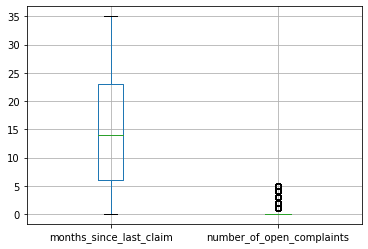

In [8]:
# Next step: fill missing values. Let's see if there are extreme values with a boxplot for the numerical columns
nan_boxplot = customer_data.boxplot(column=['months_since_last_claim','number_of_open_complaints'])

# There are some extreme values in the number_of_open_complaints column that will affect the mean.
most_freq_complaints = customer_data['number_of_open_complaints'].value_counts().idxmax()
print('Most frequent value is:', most_freq_complaints)
mean_complaints = np.mean(customer_data['number_of_open_complaints'])
print('Mean of number of open complaints is:', mean_complaints)
median_complaints = np.nanmedian(customer_data['number_of_open_complaints'])
print('Median of number of open complaints is:', median_complaints)

# Therefore, we're going to replace nan values with the most frequent value
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'] .fillna(most_freq_complaints)

In [9]:
# The months_since_last_claim column data does not present extreme values, so we can replace the nan values with the mean
mean_months_claim = np.mean(customer_data['months_since_last_claim'])
print('Mean of months since last claim is:', mean_months_claim)
customer_data['months_since_last_claim'] = customer_data['months_since_last_claim'] .fillna(mean_months_claim)

Mean of months since last claim is: 15.149070740488469


In [10]:
# Now we need to handle the nan values present on categorial columns. As we don't have business knowledge domain and can't
# infer properties yet, we'll replace the nan values with "Unknown" category
customer_data['state'] = customer_data['state'].fillna("Unknown")
customer_data['response'] = customer_data['response'].fillna("Unknown")
customer_data['vehicle_class'] = customer_data['vehicle_class'].fillna("Unknown")
customer_data['vehicle_size'] = customer_data['vehicle_size'].fillna("Unknown")

In [11]:
# Do we still have nan values in our dataframe?
print(customer_data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [12]:
# Function to extract month name from date and create
def get_month(df):
    df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    months_list = [df['month'][i].strftime(format="%B") for i in range(len(df['month']))]
    return months_list
     
customer_data['month'] = get_month(customer_data)

# Dataframe filtered by first quarter data, althought there're already only values for January and February on the original df
customer_data[customer_data['month'].isin(['January', 'February'])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,February


BONUS: Put all the previously mentioned data transformations into a function.

In [13]:
bonus_df = pd.read_csv('c:/users/ameli/IRONHACK/WEEK_1/DAY_2/AFTERNOON_SESSION/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
bonus_df = bonus_df.drop(['Unnamed: 0'], axis=1)

def clean_df(df):   
    
    # In this exercise, we define a function to handle nan values more quickly than before
    def identify_nan(df):
        nan_list = df.isnull().sum()
        drop_col = [i for i,v in nan_list.items() if (v/len(df)) > 0.40]
        fillna = [i for i,v in nan_list.items() if ((v/len(df)) > 0.02 and (v/len(df)) < 0.40)]
        for col in fillna:
            if (col == 'number_of_open_complaints'):
                median_oc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_oc)
            elif (col == 'months_since_last_claim'):
                median_lc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_lc)
            else:
                df[col] = df[col].fillna('Unknown')
        df = df.drop(drop_col, axis=1)
        return df
    
    #Apply functions
    headers_standard = standardize_data(df)
    print('Categorical cols are {} and numerical cols are {}:'.
          format(list(df.select_dtypes(['object']).columns),
                 list(df._get_numeric_data().columns)))
    no_nan = identify_nan(headers_standard)
    df['month'] = get_month(no_nan)
    df_filtered = df[df['month'].isin(['January', 'February'])]
    return df_filtered


bonus_solution = clean_df(bonus_df)
display(bonus_solution)

Categorical cols are ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'] and numerical cols are ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']:


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,...,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,...,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,A,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,...,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,...,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,A,February


### Lab | Customer Analysis Round 3

In [14]:
display(customer_data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,February


Show DataFrame info.

In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  float64
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

Describe DataFrame.

In [16]:
round(customer_data.describe(),1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0
mean,8018.2,37536.3,93.2,15.1,48.1,0.4,3.0,434.9
std,6885.1,30359.2,34.4,9.8,27.9,0.9,2.4,292.2
min,1898.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0
25%,4014.0,0.0,68.0,7.0,24.0,0.0,1.0,271.0
50%,5771.5,33813.5,83.0,15.0,48.0,0.0,2.0,382.5
75%,8993.0,62250.8,109.0,23.0,71.0,0.0,4.0,547.0
max,83325.0,99981.0,298.0,35.0,99.0,5.0,9.0,2893.0


Show a plot of the total number of responses.

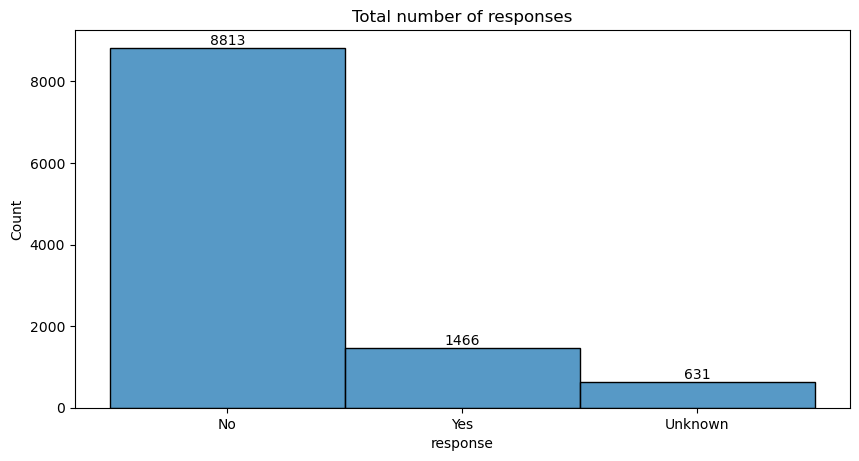

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
chart = sns.histplot(customer_data['response'])
chart.bar_label(chart.containers[0])
plt.title('Total number of responses')

plt.show()

Show a plot of the response rate by the sales channel.

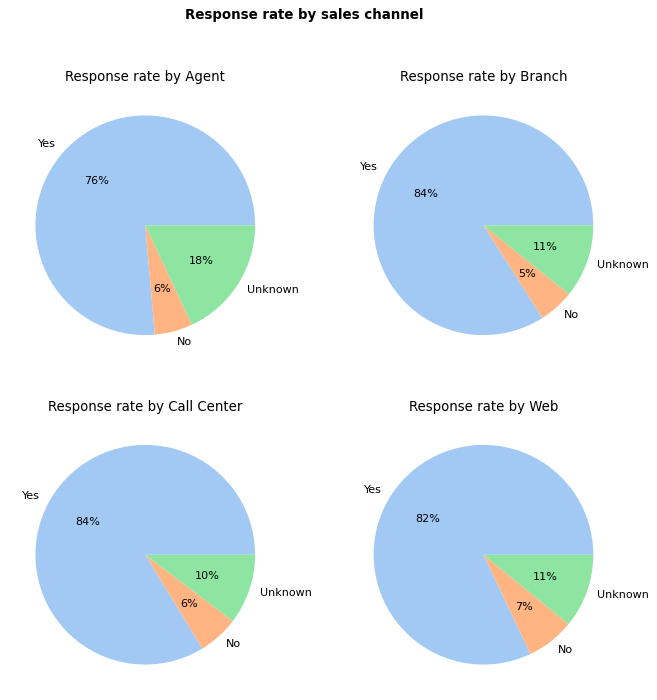

In [18]:
customer_data['response'].value_counts()
customer_data['sales_channel'].value_counts()
info_rates_dict = customer_data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().to_dict(orient='index')
    
fig, ax = plt.subplots(2, 2, figsize = (10,10), dpi = 80)
labels = ['Yes', 'No', 'Unknown']
colors = sns.color_palette('pastel')
plt.suptitle('Response rate by sales channel').set_fontweight('bold')

# Plotting values
agent = ax[0][0].pie(info_rates_dict['Agent'].values(), labels = labels, colors = colors, autopct = '%0.0f%%')
branch = ax[0][1].pie(info_rates_dict['Branch'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
call_center = ax[1][0].pie(info_rates_dict['Call Center'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
web = ax[1][1].pie(info_rates_dict['Web'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')

# Setting titles for every plot
ax[0][0].set_title('Response rate by Agent')
ax[0][1].set_title('Response rate by Branch')
ax[1][0].set_title('Response rate by Call Center')
ax[1][1].set_title('Response rate by Web')

plt.show()

Show a plot of the response rate by the total claim amount.

,Intervals,No %,Yes %,Unknown %
0,0-500,0.812170,0.127383,0.060446
1,500-1000,0.796296,0.151124,0.052579
2,1000-1500,0.785714,0.165025,0.049261
3,1500-2000,0.952381,0.000000,0.047619
4,2000-2500,0.888889,0.000000,0.111111
5,2500-3000,1.000000,0.000000,0.000000


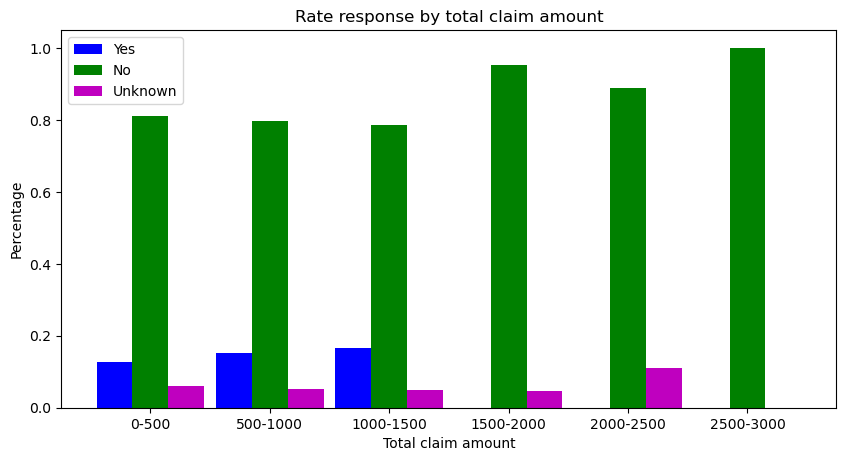

In [19]:
bins = [500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
values = []
count = 0

for num in bins:
    filtered = customer_data.loc[(customer_data['total_claim_amount'] >= count) & (customer_data['total_claim_amount'] < num)]
    count = num
    groupedby = filtered.groupby('response')['total_claim_amount'].count().to_dict()
    values.append(groupedby)

new_df = pd.DataFrame(values)
new_df['Intervals'] = labels
new_df = new_df.fillna(0)
new_df['No %'] = new_df['No'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])
new_df['Yes %'] = new_df['Yes'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])
new_df['Unknown %'] = new_df['Unknown'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])
new_df = new_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(new_df)

#new_df.plot(x='Intervals', kind='bar',stacked=False, title='Grouped Bar Graph with dataframe')
fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis = np.arange(len(labels))
plt.bar(x_axis-0.3, new_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis, new_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis+0.3, new_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by total claim amount')
plt.xlabel("Total claim amount", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis, labels)
plt.legend()


plt.show()

Show a plot of the response rate by income.

,Intervals,No %,Yes %,Unknown %
0,0-20.000,0.667722,0.284810,0.047468
1,20.000-40.000,0.755249,0.190462,0.054289
2,40.000-60.000,0.779934,0.166311,0.053755
3,60.000-80.000,0.781584,0.161174,0.057242
4,80.000-100.000,0.790472,0.152653,0.056876


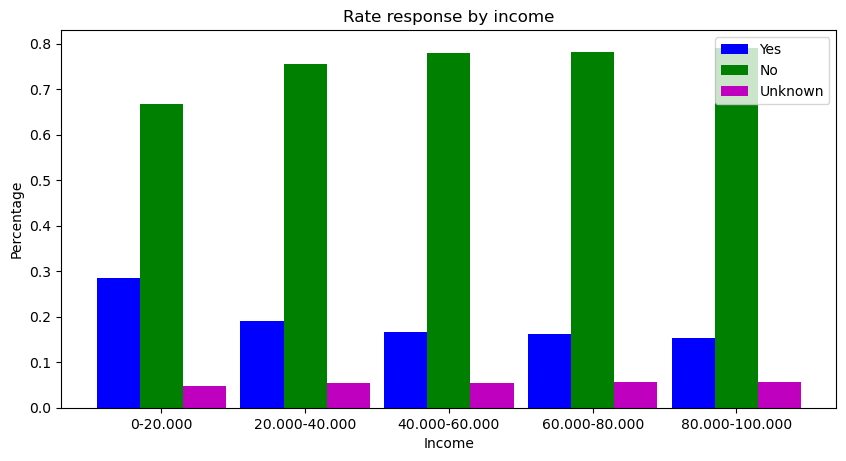

In [20]:
bins_income = [20000, 40000, 60000, 80000, 100000]
labels_income = ['0-20.000', '20.000-40.000', '40.000-60.000', '60.000-80.000', '80.000-100.000']
values_income = []
count_income = 0

for num in bins_income:
    filtered_income = customer_data.loc[(customer_data['income'] >= count) & (customer_data['income'] < num)]
    count_income = num
    groupedby_income = filtered_income.groupby('response')['income'].count().to_dict()
    values_income.append(groupedby_income)

new_income_df = pd.DataFrame(values_income)
new_income_df['Intervals'] = labels_income
new_income_df = new_income_df.fillna(0)
new_income_df['No %'] = new_income_df['No'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])
new_income_df['Yes %'] = new_income_df['Yes'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])
new_income_df['Unknown %'] = new_income_df['Unknown'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])
new_income_df = new_income_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(new_income_df)

#new_df.plot(x='Intervals', kind='bar',stacked=False, title='Grouped Bar Graph with dataframe')
fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis_income = np.arange(len(labels_income))
plt.bar(x_axis_income-0.3, new_income_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis_income, new_income_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis_income+0.3, new_income_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by income')
plt.xlabel("Income", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis_income, labels_income)
plt.legend()

plt.show()